In [1]:
import pandas as pd

# Load the dataset (if not already in memory)
file_path = "data/featured_clinvar_result.csv"
df = pd.read_csv(file_path)


In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

# Select features and target
features = df.drop(columns=["position", "label"])
target = df["label"]



In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [4]:
# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target)
n_classes = len(np.unique(y))

# Reshape for LSTM input
X = np.expand_dims(X, axis=1)  # Adding sequence length dimension

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
hidden_units = 64

# Encoder
encoder_inputs = Input(shape=(1, X.shape[2]))  # Time step = 1
encoder_lstm = Bidirectional(LSTM(hidden_units, return_sequences=False))(encoder_inputs)
encoder_output = Dense(hidden_units, activation='relu')(encoder_lstm)

# Decoder
decoder_inputs = Dense(hidden_units, activation='relu')(encoder_output)
decoder_outputs = Dense(n_classes, activation='softmax')(decoder_inputs)

In [6]:

# Model
model = Model(encoder_inputs, decoder_outputs)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [7]:
# Train model
epochs = 50
batch_size = 32
history=model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7011 - loss: 0.6395 - val_accuracy: 0.8765 - val_loss: 0.4231
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8774 - loss: 0.3437 - val_accuracy: 0.8971 - val_loss: 0.2514
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8898 - loss: 0.2452 - val_accuracy: 0.9218 - val_loss: 0.2201
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9367 - loss: 0.1802 - val_accuracy: 0.9177 - val_loss: 0.2097
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9068 - loss: 0.1989 - val_accuracy: 0.9259 - val_loss: 0.2206
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9200 - loss: 0.1762 - val_accuracy: 0.9095 - val_loss: 0.2335
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9313 - loss: 0.1611 - val_accuracy: 0.9259 - val_loss: 0.2109
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9321 - loss: 0.1671 - val_accuracy: 0.9300 - val_loss

In [8]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9333 - loss: 0.1835 
Accuracy: 93.42%


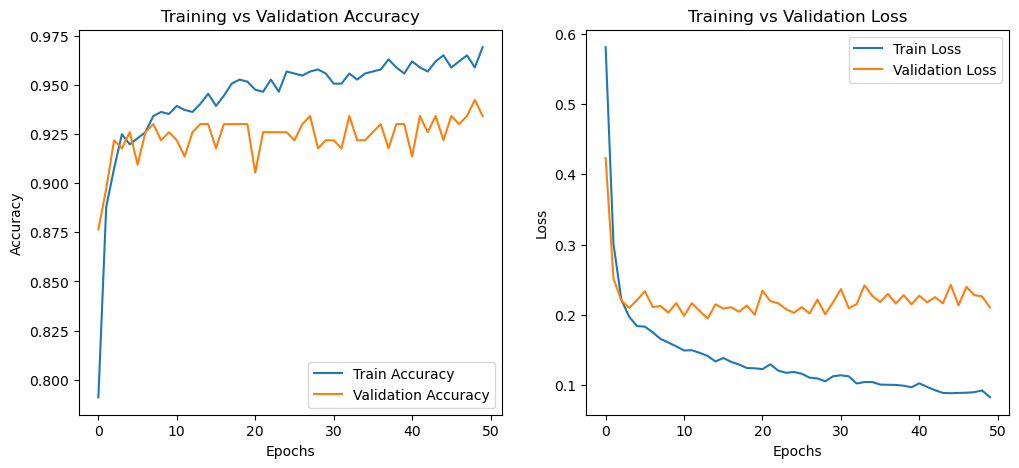

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [ ]:
# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary labels

# Print some sample predictions
print("Predicted labels:", y_pred[:10].flatten())
print("Actual labels:   ", y_test[:10].values)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Predicted labels: [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       112

    accuracy                           1.00       243
   macro avg       1.00      1.00      1.00       243
weighted avg       1.00      1.00      1.00       243

[[131   0]
 [  0 112]]


In [ ]:
model_path = "models/rnn_model.pkl"
joblib.dump(RNN_LSTM, model_path)

print(f"✅ Model Saved at: {model_path}")